In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima_model import ARIMA, ARMAResults 
import datetime 
import sys 
import seaborn as sns 
import statsmodels 
import statsmodels.stats.diagnostic as diag 
from statsmodels.tsa.stattools import adfuller 


In [ ]:
from scipy.stats.mstats import normaltest 
 
from matplotlib.pyplot import acorr 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
ds = pd.read_csv('data_stocks.csv') 
ds.head() 


In [ ]:
ds['DATE'].dtypes

In [ ]:
ds['DATE'] = pd.to_datetime(ds['DATE'], unit='s')

In [ ]:
ds['DATE'].tail()

In [ ]:
ds.index = ds['DATE']

In [ ]:

ds.drop('DATE',axis = 1,inplace=True)

In [ ]:
ds.tail()

# Problem Statement: 
Pick up the following stocks and generate forecasts accordingly 
 Stocks: 
5. NASDAQ.EBAY 



In [ ]:
ds_EBAY = ds[['NASDAQ.EBAY']].copy()


In [ ]:
print(ds_EBAY.tail())


In [ ]:
ds_EBAY.count()

In [ ]:
ds_EBAY.plot()

Stationary means mean,variance and covariance is constant over periods.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_EBAY)

# Converting series to stationary

In [ ]:

ds_EBAY.shift(1)

In [ ]:
X = ds_EBAY.values
train = X[0:28886] # 28886 data as train data
test = X[28886:] # 12380 data as test data
print(train.size)
print(test.size)
predictions = []

# ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:

import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [ ]:

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 124317.93290534393
(0, 0, 1) 85271.48908067048
(0, 1, 0) -80762.52187440007
(0, 1, 1) -81075.63405539673
(0, 1, 2) -81074.17286811695
(0, 1, 3) -81090.00715673757
(0, 1, 4) -81093.98472065314
(0, 1, 5) -81101.87576670667
(0, 2, 0) -63874.98955883522
(0, 2, 1) -80619.27303639856
(0, 2, 2) -80936.0464222823
(1, 0, 0) -80762.97956367323
(1, 0, 1) -81077.32276343508
(1, 0, 2) -81075.79810984764
(1, 0, 3) -81091.2645973408
(1, 0, 4) -81095.05246453217
(1, 0, 5) -81102.70785605855
(1, 1, 0) -81067.89180999978
(1, 1, 1) -81073.99649149469
(1, 1, 2) -81099.24105674365
(1, 1, 3) -81095.99043051685
(1, 2, 0) -70003.48847377133
(1, 2, 1) -80988.20233128445
(1, 2, 2) -81013.42223740883
(1, 2, 4) -81035.17791300318
(1, 2, 5) -81031.5441123314
(2, 0, 0) -81069.70670014125
(2, 0, 1) -81075.64369735558
(2, 0, 2) -81098.79258012856
(2, 0, 3) -81096.91007329832
(2, 1, 0) -81077.86550535493
(2, 1, 1) -81094.92273708615
(2, 1, 2) -81099.54378042465
(2, 1, 3) -81102.23796795685
(2, 2, 0) -72749.7

In [25]:

#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64744.94423435074


In [26]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61361658, 150.61508213, 150.61485932, ..., 153.58414297,
       153.58438291, 153.58462284])

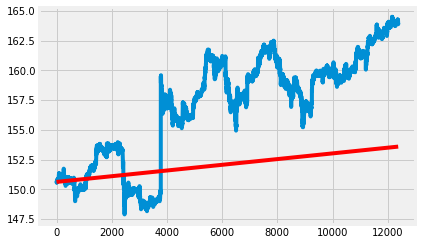

In [27]:
plt.plot(test)
plt.plot(predictions, color='red')

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.55078259648602


# The above forecasting done for NASDAQ.EBAY